IMPORTING NECCESARY LIBRARIES

In [344]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import matplotlib.pyplot as plt

In [345]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [346]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [347]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [348]:
X=df.iloc[:,1:60]
y=df['shares']
X.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


### creating heatmap

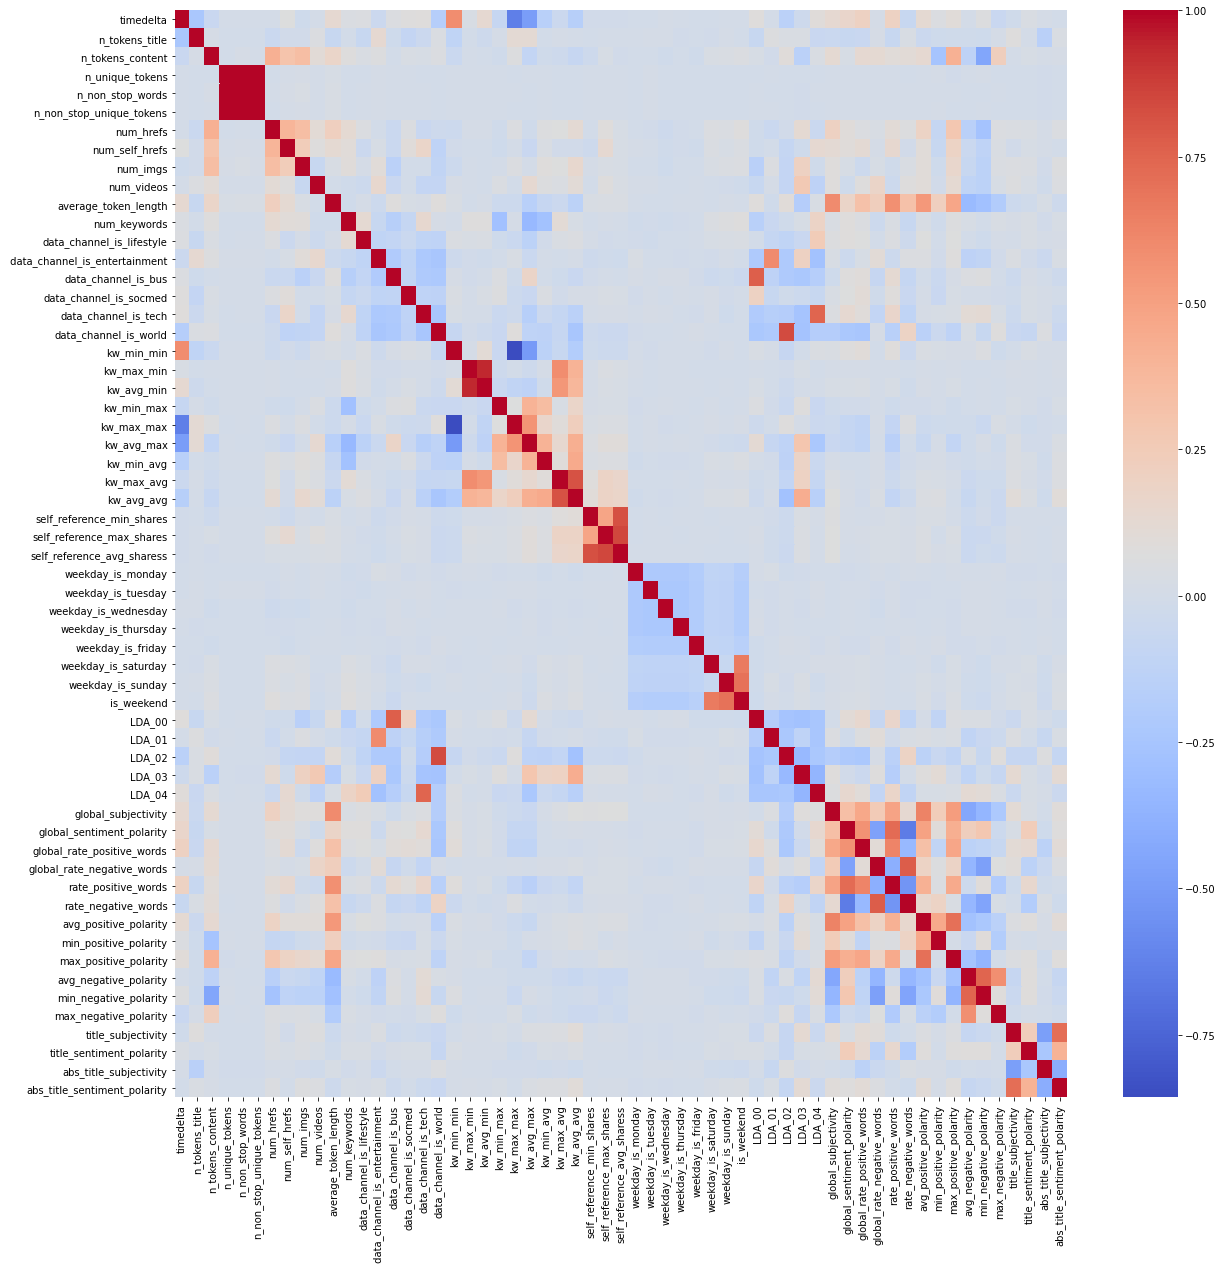

In [349]:
corr = X.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap='coolwarm',cbar=True)
plt.show()

# Using Linear Regression 

In [350]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [351]:
from sklearn.preprocessing import StandardScaler

In [352]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [353]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [354]:
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)
print ("RMSE on Test Data  is: {:.2f}".format(mean_squared_error(y_test, y_pred,squared=False)))
print("R2_score : ",r2_score(y_test,y_pred))

RMSE on Test Data  is: 7421.77
R2_score :  0.024886216861380484


analysis of target value y and see if there are outliers and get rid of them

In [355]:
print(y.value_counts(ascending=False))

1100      2308
1200      2018
1300      1740
1400      1592
1500      1323
          ... 
115700       1
25600        1
376          1
280          1
82200        1
Name: shares, Length: 1454, dtype: int64


C:\Users\HP\Downloads\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='shares'>

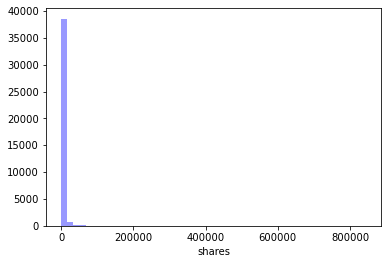

In [356]:
sns.distplot(y,kde=False,color="blue")

#### lets filter data upto some extent to avoid large memory usage

In [357]:
def filter_threshold_data(df_copy,threshold,column_name):
    df_adjusted = df_copy[df_copy[column_name] <= threshold]
    print (" Original Data Count:", len(df_copy))
    print (" After Adjusting Data Count:", len(df_adjusted))
    return df_adjusted

In [358]:
df_adjusted = filter_threshold_data(df,20000,"shares")

 Original Data Count: 39644
 After Adjusting Data Count: 38826


In [359]:
df_adjusted.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [360]:
X = df_adjusted.iloc[:,1:60]
X.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [361]:
y=df_adjusted['shares']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

### Lets use DecisionTreeApproach

In [362]:
def decision_tree_regression(depth,X_train,y_train,X_test,y_test):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    y_pred_dg = model.predict(X_test)
    print ("Tree Max Depth is:",depth)
    print ("RMSE on Test Data is: {:.2f} :".format(mean_squared_error(y_test, y_pred_dg,squared=False)))
    print("R2 score",r2_score(y_test,y_pred_dg))
    models.append(model)
    

In [363]:
models=[]
depth_range = [1,2,3,4,5,40]
print ("Starting Decision Tree Regression:")
for depth in depth_range:
    decision_tree_regression(depth,X_train,y_train,X_test,y_test)
print(models)

Starting Decision Tree Regression:
Tree Max Depth is: 1
RMSE on Test Data is: 2786.94 :
R2 score 0.029024392229328178
Tree Max Depth is: 2
RMSE on Test Data is: 2769.31 :
R2 score 0.041273507034381374
Tree Max Depth is: 3
RMSE on Test Data is: 2760.18 :
R2 score 0.0475810115648585
Tree Max Depth is: 4
RMSE on Test Data is: 2763.66 :
R2 score 0.045176038256056206
Tree Max Depth is: 5
RMSE on Test Data is: 2776.12 :
R2 score 0.03655246728487871
Tree Max Depth is: 40
RMSE on Test Data is: 3973.91 :
R2 score -0.9741909860846842
[DecisionTreeRegressor(max_depth=1), DecisionTreeRegressor(max_depth=2), DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=4), DecisionTreeRegressor(max_depth=5), DecisionTreeRegressor(max_depth=40)]


### MAX DEPTH SHOULD BE 3

In [364]:
print(models[2])

DecisionTreeRegressor(max_depth=3)


## Using PCA 

In [365]:
from sklearn.decomposition import PCA
pca=PCA()

max variance is taken about 95 percent

In [366]:
X_train=pca.fit_transform(X_train)
X_train= pd.DataFrame(X_train)
X_train = X_train.loc[:,pca.explained_variance_ratio_.cumsum()<0.95]

In [367]:
fea=X_train.shape
print(f'no of features are : {fea[1]}')

no of features are : 2


transforming X

In [368]:
pca=PCA(n_components=fea[1])
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)


In [369]:
y_train = np.log(y_train)
y_test = np.log(y_test)

# BOOSTING THE DECISION TREE WITH ADABOOST

In [370]:
def ada_boost_regression(X_train,y_train,X_test,y_test,n):
    AdaDecision = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3,min_samples_leaf= 5, min_samples_split= 5),
                                n_estimators=n)
    AdaDecision.fit(X_train, y_train)
    y_pred_ada = AdaDecision.predict(X_test)
    print ("Estimator Count in AdaBoostRegressor:",n)
    print ("RMSE on Test Data is: {:.2f} :".format(mean_squared_error(y_test, y_pred_ada,squared=False)))
    print('-------------------------------------------')

In [371]:
n_estimators_list = [10,40,50,100,125,150]
for n in n_estimators_list:
    ada_boost_regression(X_train,y_train,X_test,y_test,n) 

Estimator Count in AdaBoostRegressor: 10
RMSE on Test Data is: 0.82 :
-------------------------------------------
Estimator Count in AdaBoostRegressor: 40
RMSE on Test Data is: 0.82 :
-------------------------------------------
Estimator Count in AdaBoostRegressor: 50
RMSE on Test Data is: 0.84 :
-------------------------------------------
Estimator Count in AdaBoostRegressor: 100
RMSE on Test Data is: 0.83 :
-------------------------------------------
Estimator Count in AdaBoostRegressor: 125
RMSE on Test Data is: 0.85 :
-------------------------------------------
Estimator Count in AdaBoostRegressor: 150
RMSE on Test Data is: 0.83 :
-------------------------------------------


### END